<a href="https://colab.research.google.com/github/Jacobikinz/Project-Hummingbird/blob/master/SimpleNewsGraphs_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RSS Live Feed to Pandas


In [0]:
!pip install feedparser

In [0]:
from sklearn import cluster, datasets
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import random

**Creating RSS news list**

In [0]:
import feedparser

#news sources to import fromt 
newsurls = {
    'apnews':           'http://hosted2.ap.org/atom/APDEFAULT/3d281c11a96b4ad082fe88aa0db04305',
    'googlenews':       'https://news.google.com/news/rss/?hl=en&amp;ned=us&amp;gl=US',
    'yahoonews':        'http://news.yahoo.com/rss/',
    'cbnc':             'https://www.cnbc.com/id/100003114/device/rss/rss.html',
    'espn':             'http://www.espn.com/espn/rss/news',
    'nytimes_environment':  "http://rss.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml",
    'nytimes_business':     "http://rss.nytimes.com/services/xml/rss/nyt/Business.xml",
    'nytimes_economy':      "http://rss.nytimes.com/services/xml/rss/nyt/Economy.xml",
    'nytimes_dealbook':     "http://rss.nytimes.com/services/xml/rss/nyt/Economy.xml",
}

#(hopefully) continuously building dataset
data = pd.DataFrame()

#add something useful to the dataframe!!
for key,url in newsurls.items():
  feed = feedparser.parse(url)
  rawData = pd.DataFrame.from_dict(feed['items'])
  data = pd.concat([data, rawData], sort=True)

# Sentiment Analysis

In [0]:
from datetime import datetime

#yay I'm solving my life problems by creating excessive PANDAS frames
headlines = pd.DataFrame()

headlines['title'], headlines['time_raw'] = data['title'], data['published_parsed'] #lol see

import time as ti
output = []
for val in headlines['time_raw'].values:
    output.append(ti.strftime("%Y-%m-%d %H:%M:%S", val))
       
headlines['fixed_time'] = output 

In [0]:
#sentiment stuff!

import nltk
nltk.download('vader_lexicon')

def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score
  
sentiment_raw = headlines['title'].apply(nltk_sentiment)
sentiment = pd.DataFrame(sentiment_raw.values.tolist())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
headlines['stringTime'] = headlines['fixed_time']
headlines['stringTime'].replace(regex=True,inplace=True,to_replace=r'-',value=r'')
headlines['stringTime'].replace(regex=True,inplace=True,to_replace=r'\:',value=r'')
headlines['stringTime'].replace(regex=True,inplace=True,to_replace=r' ',value=r'')

In [0]:
numericalHeadline = sentiment.iloc[:,0]
time = headlines.iloc[:,-2]

In [0]:
headlines

,title,time_raw,fixed_time,stringTime,compound,neg,neu,pos
0,Missouri Senate passes bill to outlaw abortion...,"(2019, 5, 16, 10, 22, 0, 3, 136, 0)",2019-05-16 10:22:00,20190516102200,0.0000,0.000,1.000,0.000
1,Huawei: China threatens to retaliate over US s...,"(2019, 5, 16, 14, 1, 33, 3, 136, 0)",2019-05-16 14:01:33,20190516140133,-0.3818,0.224,0.776,0.000
2,Here's how you'll know we're about to go to wa...,"(2019, 5, 16, 9, 40, 0, 3, 136, 0)",2019-05-16 09:40:00,20190516094000,-0.5994,0.187,0.813,0.000
3,"Trump's immigration proposal sounds nice, but ...","(2019, 5, 16, 15, 39, 0, 3, 136, 0)",2019-05-16 15:39:00,20190516153900,0.6956,0.000,0.693,0.307
4,Missouri Senate passes sweeping anti-abortion ...,"(2019, 5, 16, 13, 20, 0, 3, 136, 0)",2019-05-16 13:20:00,20190516132000,0.0000,0.000,1.000,0.000
5,"Eight million jobs, $9tn in spending: Jay Insl...","(2019, 5, 16, 12, 0, 0, 3, 136, 0)",2019-05-16 12:00:00,20190516120000,0.0000,0.000,1.000,0.000
6,SAT to use 'adversity score' for students appl...,"(2019, 5, 16, 15, 45, 55, 3, 136, 0)",2019-05-16 15:45:55,20190516154555,-0.4215,0.203,0.797,0.000
7,Camp Fire: Paradise water contaminated with el...,"(2019, 5, 16, 11, 37, 0, 3, 136, 0)",2019-05-16 11:37:00,20190516113700,0.4215,0.136,0.625,0.239
8,School sparks outrage for Middle Eastern headw...,"(2019, 5, 16, 16, 31, 12, 3, 136, 0)",2019-05-16 16:31:12,20190516163112,-0.1531,0.183,0.667,0.150
9,Trump Administration Wants To Cut Funding For ...,"(2019, 5, 16, 15, 39, 0, 3, 136, 0)",2019-05-16 15:39:00,20190516153900,-0.2732,0.174,0.826,0.000


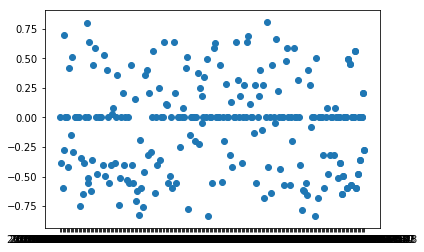

In [0]:
headlines
headlines.to_csv('headliners.csv')
plt.scatter(time, numericalHeadline)

In [0]:
headlines

,title,time_raw,fixed_time,stringTime,compound,neg,neu,pos
0,Missouri Senate passes bill to outlaw abortion...,"(2019, 5, 16, 10, 22, 0, 3, 136, 0)",2019-05-16 10:22:00,20190516102200,0.0000,0.000,1.000,0.000
1,Huawei: China threatens to retaliate over US s...,"(2019, 5, 16, 14, 1, 33, 3, 136, 0)",2019-05-16 14:01:33,20190516140133,-0.3818,0.224,0.776,0.000
2,Here's how you'll know we're about to go to wa...,"(2019, 5, 16, 9, 40, 0, 3, 136, 0)",2019-05-16 09:40:00,20190516094000,-0.5994,0.187,0.813,0.000
3,"Trump's immigration proposal sounds nice, but ...","(2019, 5, 16, 15, 39, 0, 3, 136, 0)",2019-05-16 15:39:00,20190516153900,0.6956,0.000,0.693,0.307
4,Missouri Senate passes sweeping anti-abortion ...,"(2019, 5, 16, 13, 20, 0, 3, 136, 0)",2019-05-16 13:20:00,20190516132000,0.0000,0.000,1.000,0.000
5,"Eight million jobs, $9tn in spending: Jay Insl...","(2019, 5, 16, 12, 0, 0, 3, 136, 0)",2019-05-16 12:00:00,20190516120000,0.0000,0.000,1.000,0.000
6,SAT to use 'adversity score' for students appl...,"(2019, 5, 16, 15, 45, 55, 3, 136, 0)",2019-05-16 15:45:55,20190516154555,-0.4215,0.203,0.797,0.000
7,Camp Fire: Paradise water contaminated with el...,"(2019, 5, 16, 11, 37, 0, 3, 136, 0)",2019-05-16 11:37:00,20190516113700,0.4215,0.136,0.625,0.239
8,School sparks outrage for Middle Eastern headw...,"(2019, 5, 16, 16, 31, 12, 3, 136, 0)",2019-05-16 16:31:12,20190516163112,-0.1531,0.183,0.667,0.150
9,Trump Administration Wants To Cut Funding For ...,"(2019, 5, 16, 15, 39, 0, 3, 136, 0)",2019-05-16 15:39:00,20190516153900,-0.2732,0.174,0.826,0.000


#Getting Minute-by-Minute Data
https://www.cloudsigma.com/nasdaq-per-minute-data-using-python/

In [0]:
import urllib.request
import json
import os

def import_web(ticker):
    """
    :param identifier: List, Takes the company name
    :return:displays companies records per minute
    """
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol='+ticker +'&interval=1min&apikey=' + 'LIH75FGJ5OL2MJSZ' + '&outputsize=full&datatype=json'
    fp = urllib.request.urlopen(url)
    mybytes = fp.read()
    mystr = mybytes.decode("utf8")
    fp.close()
    return mystr


def get_value(ticker):
    js = import_web(ticker)
    parsed_data = json.loads(js) # loads the json and converts the json string into dictionary
    ps = parsed_data['Time Series (1min)']
    partitionSave(ps,ticker)

            
def partitionSave(ps,ticker):
    date = {}
    for i in ps:
        date[i[:10]] = "date"
    for d in date.keys():
        tmp = {}
        for i in ps:
            if(i[:10] == d):
                tmp[i] = ps[i]
        if(os.path.isdir(d) == False):
            os.mkdir(d)
        fname = ticker + "_dann"
        try:
            with open(os.path.join(d,fname),'r') as f:
                t = json.load(f)
                for i in t:
                    tmp[i]=t[i]
        except Exception as e:
            pass
                
        with open(os.path.join(d,fname), 'w') as f:
            json.dump(tmp, f)
                
def main():
    #Start Process
    company_list = ['GOOGL','MSFT','ORCL','FB','AAPL','TSLA'];
    try:
        for company in company_list:
            print("Starting with " + company)
            get_value(company)
            print("Ended Writing Data of " + company)
    except Exception as e:
        print(e)

main()

Starting with GOOGL
Ended Writing Data of GOOGL
Starting with MSFT
Ended Writing Data of MSFT
Starting with ORCL
Ended Writing Data of ORCL
Starting with FB
Ended Writing Data of FB
Starting with AAPL
Ended Writing Data of AAPL
Starting with TSLA
'Time Series (1min)'


In [0]:
cd /content/

/content


In [0]:
from pandas.io.json import json_normalize
import datetime

#def dataToPandas(ticker, date):

today = datetime.date.today()  
todayday = today.day

filenamer = "2019-05-%s/AAPL_dann" % todayday


with open(filenamer) as f:
	 parseData_raw = json.load(f)

for key in parseData_raw:
	temp={}
	parseData=parseData_raw[key]
	for key2 in parseData:
		temp[key2[3:]]=float(parseData[key2])
	parseData_raw[key]=temp
  
stockDataCompany = pd.DataFrame(parseData_raw).transpose()

stockDataCompany = stockDataCompany.reset_index()
stockDataCompany['openToClose'] = stockDataCompany['open']-stockDataCompany['close']

In [0]:
stockDataCompany

,index,close,high,low,open,volume,openToClose
0,2019-05-16 13:20:00,191.6150,191.6473,191.5650,191.5900,18622.0,-0.0250
1,2019-05-16 13:19:00,191.5700,191.6032,191.5550,191.5900,27028.0,0.0200
2,2019-05-16 13:18:00,191.6000,191.6097,191.5500,191.6000,33611.0,0.0000
3,2019-05-16 13:17:00,191.6062,191.6700,191.5700,191.6700,33309.0,0.0638
4,2019-05-16 13:16:00,191.7050,191.7200,191.5857,191.5857,50175.0,-0.1193
5,2019-05-16 13:15:00,191.5844,191.5997,191.5300,191.5700,28676.0,-0.0144
6,2019-05-16 13:14:00,191.5750,191.5750,191.5000,191.5200,25809.0,-0.0550
7,2019-05-16 13:13:00,191.4900,191.4900,191.3311,191.4050,34335.0,-0.0850
8,2019-05-16 13:12:00,191.4099,191.4100,191.2700,191.2800,46047.0,-0.1299
9,2019-05-16 13:11:00,191.2855,191.3100,191.1000,191.2500,124069.0,-0.0355


In [0]:
#stockDataCompany['index'].replace(regex=True,inplace=True,to_replace=r'-',value=r'')
#stockDataCompany['index'].replace(regex=True,inplace=True,to_replace=r'\:',value=r'')
#stockDataCompany['index'].replace(regex=True,inplace=True,to_replace=r' ',value=r'')

In [0]:
headlines[3:10]

,title,time_raw,fixed_time,stringTime,compound,neg,neu,pos
3,"Trump's immigration proposal sounds nice, but ...","(2019, 5, 16, 15, 39, 0, 3, 136, 0)",2019-05-16 15:39:00,20190516153900,0.6956,0.000,0.693,0.307
4,Missouri Senate passes sweeping anti-abortion ...,"(2019, 5, 16, 13, 20, 0, 3, 136, 0)",2019-05-16 13:20:00,20190516132000,0.0000,0.000,1.000,0.000
5,"Eight million jobs, $9tn in spending: Jay Insl...","(2019, 5, 16, 12, 0, 0, 3, 136, 0)",2019-05-16 12:00:00,20190516120000,0.0000,0.000,1.000,0.000
6,SAT to use 'adversity score' for students appl...,"(2019, 5, 16, 15, 45, 55, 3, 136, 0)",2019-05-16 15:45:55,20190516154555,-0.4215,0.203,0.797,0.000
7,Camp Fire: Paradise water contaminated with el...,"(2019, 5, 16, 11, 37, 0, 3, 136, 0)",2019-05-16 11:37:00,20190516113700,0.4215,0.136,0.625,0.239
8,School sparks outrage for Middle Eastern headw...,"(2019, 5, 16, 16, 31, 12, 3, 136, 0)",2019-05-16 16:31:12,20190516163112,-0.1531,0.183,0.667,0.150
9,Trump Administration Wants To Cut Funding For ...,"(2019, 5, 16, 15, 39, 0, 3, 136, 0)",2019-05-16 15:39:00,20190516153900,-0.2732,0.174,0.826,0.000


In [0]:
sentiment[3:10]

,compound,neg,neu,pos
3,0.6956,0.000,0.693,0.307
4,0.0000,0.000,1.000,0.000
5,0.0000,0.000,1.000,0.000
6,-0.4215,0.203,0.797,0.000
7,0.4215,0.136,0.625,0.239
8,-0.1531,0.183,0.667,0.150
9,-0.2732,0.174,0.826,0.000


https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

In [0]:
print (headlines.shape)
print (sentiment.shape)

(254, 4)
(254, 4)


In [0]:
headlines['compound'] = sentiment['compound']
headlines['neg'] = sentiment['neg']
headlines['neu'] = sentiment['neu']
headlines['pos'] = sentiment['pos']

print (headlines.iloc[0])
#print (headlines)
headlines[0:10]["stringTime"]

title         Missouri Senate passes bill to outlaw abortion...
time_raw                    (2019, 5, 16, 10, 22, 0, 3, 136, 0)
fixed_time                                  2019-05-16 10:22:00
stringTime                                       20190516102200
compound                                                      0
neg                                                           0
neu                                                           1
pos                                                           0
Name: 0, dtype: object


0    20190516102200
1    20190516140133
2    20190516094000
3    20190516153900
4    20190516132000
5    20190516120000
6    20190516154555
7    20190516113700
8    20190516163112
9    20190516153900
Name: stringTime, dtype: object

In [0]:
stockDataCompany[0:10]["index"]

0    2019-05-14 15:59:00
1    2019-05-14 15:58:00
2    2019-05-14 15:57:00
3    2019-05-14 15:56:00
4    2019-05-14 15:55:00
5    2019-05-14 15:54:00
6    2019-05-14 15:53:00
7    2019-05-14 15:52:00
8    2019-05-14 15:51:00
9    2019-05-14 15:50:00
Name: index, dtype: object

In [0]:
#headlines

data0 = pd.concat([sentiment, headlines], sort=True, axis=1)
data0

ValueError: ignored

In [0]:
data = pd.concat([sentiment, stockDataCompany], sort=True, axis=1)

data = pd.DataFrame.dropna(data)
data

,compound,neg,neu,pos,index,close,high,low,open,volume,openToClose
0,0.0000,0.000,1.000,0.000,2019-05-16 13:20:00,191.6150,191.6473,191.5650,191.5900,18622.0,-0.0250
1,-0.3818,0.224,0.776,0.000,2019-05-16 13:19:00,191.5700,191.6032,191.5550,191.5900,27028.0,0.0200
2,-0.5994,0.187,0.813,0.000,2019-05-16 13:18:00,191.6000,191.6097,191.5500,191.6000,33611.0,0.0000
3,0.6956,0.000,0.693,0.307,2019-05-16 13:17:00,191.6062,191.6700,191.5700,191.6700,33309.0,0.0638
4,0.0000,0.000,1.000,0.000,2019-05-16 13:16:00,191.7050,191.7200,191.5857,191.5857,50175.0,-0.1193
5,0.0000,0.000,1.000,0.000,2019-05-16 13:15:00,191.5844,191.5997,191.5300,191.5700,28676.0,-0.0144
6,-0.4215,0.203,0.797,0.000,2019-05-16 13:14:00,191.5750,191.5750,191.5000,191.5200,25809.0,-0.0550
7,0.4215,0.136,0.625,0.239,2019-05-16 13:13:00,191.4900,191.4900,191.3311,191.4050,34335.0,-0.0850
8,-0.1531,0.183,0.667,0.150,2019-05-16 13:12:00,191.4099,191.4100,191.2700,191.2800,46047.0,-0.1299
9,-0.2732,0.174,0.826,0.000,2019-05-16 13:11:00,191.2855,191.3100,191.1000,191.2500,124069.0,-0.0355


In [0]:
data.to_csv('stock_minutes.csv')

In [0]:
import datetime 

currentTime = datetime.datetime.now()
currentTime = str(currentTime)

year = currentTime[0:4]
month = currentTime[5:7]
day = currentTime[8:10]


def openStock(ticker):
  for i in range(5):
    currentDay = int(day)-i
    with open(+year+'-'+month+'-'+day+'/'+ticker+'_dann') as f:
	    parseData_raw = json.load(f)

    for key in parseData_raw:
	    temp={}
	    parseData=parseData_raw[key]
	    for key2 in parseData:
		    temp[key2[3:]]=float(parseData[key2])
	    parseData_raw[key]=temp
  
  stockDataCompany = pd.DataFrame(parseData_raw).transpose()
  
  return stockDataCompany

In [0]:
plt.figure()
plt.scatter(data["index"], data["openToClose"])
plt.scatter(data["index"], data["compound"])

#LINEAR REGRESSION

In [0]:
train, test = train_test_split(data, test_size=0.2)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linregtest = LinearRegression(normalize=True)

X = train.loc[:,"compound"].values.reshape(-1,1)
y = train.loc[:,'openToClose']

linregtest.fit(X, y)
predicted_close = linregtest.predict(test["compound"].values.reshape(-1,1))

plt.figure()
plt.plot(test["compound"], predicted_close)
plt.scatter(test["compound"], test["openToClose"])

#NEURAL NET

In [0]:
from sklearn.neural_network import MLPRegressor

neuralnet = MLPRegressor()
neuralnet.fit(X, y)

predicted_close = neuralnet.predict(test["compound"].values.reshape(-1,1))

plt.figure()
plt.plot(test["compound"], predicted_close)
plt.scatter(test["compound"], test["openToClose"])